# 103590450 四資四 馬茂源

### 1. It is known that the HIV test has only 0.1% of false positive and false negative, respectively. However, for a specific group of people, the prevalence of HIV positive rate is 0.01 %. If a person belongs to such a group and is found to be positive in the HIV test, find the probability that the person is really infected.

|   | true | false |
--- | :-: | :-:
| test positive  | `0.01% * 99.9%` | `99.99% *  0.1%` |
| test negative  | `0.01% *  0.1%` | `99.99% * 99.9%` |
| | `0.01%` | `99.99%` |

P(really infected | test positive) = precision = ![precision](https://latex.codecogs.com/svg.latex?%5CLARGE%20%5Cfrac%7BTP%7D%7BTP&plus;FP%7D)

= `0.01% * 99.9%` / (`0.01% * 99.9%` + `99.99% * 0.1%`) = 0.09083469721767594 = **9.08%**

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### 2 . UC Irvine has a large repository for various kinds of data. In this problem, you are asked to use the iris dataset (https://archive.ics.uci.edu/ml/datasets/Iris) to perform the experiments. Implement the k-NN classifier for the classification task. To begin one experiment, randomly draw 70 % of the instances for training and the rest for testing. Repeat the drawing and the k-NN classification 10 times and compute the average accuracy. Then, plot the curve of k versus accuracy for k = 1, 3, …, 15. For simplicity, use the Euclidean distance in your computation.

In [3]:
N = 10 #200次的話曲線比較穩定 不過題目說10次就用10次

In [4]:
class MyKNeighborsClassifier:
    
    def __init__(self, n_neighbors=3, **kwargs):
        self._k = n_neighbors
        self._X = self._y = None
        self.set_params(**kwargs)
            
    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return self.__dict__

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, X, y):
        self._X = X
        self._y = y
    
    def _predict(self, x):
        distances = np.apply_along_axis(lambda x1: np.linalg.norm(x-x1), 
                                        1, self._X)
        X_candidates = np.argsort(distances)[:self._k]
        y_candidates = self._y[X_candidates]
        return np.argmax(np.bincount(y_candidates.astype('int64')))
    
    def score(self, X, y_true):
        return accuracy_score(y_true, self.predict(X))
    
    def predict(self, X):
        return np.apply_along_axis(lambda x: self._predict(x), 1, X)

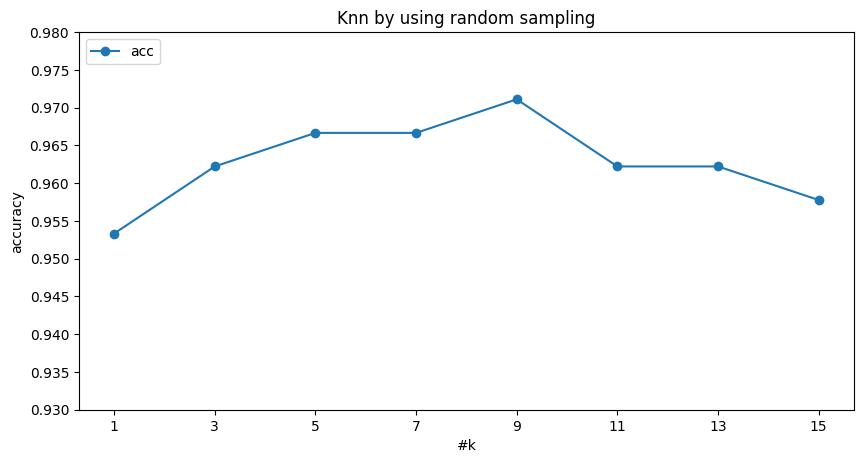

In [5]:
K = list(range(1, 15+1, 2))
Knn_acc = []
for k in K:
    # Repeat the drawing and the k-NN classification 10 times.
    acc = []
    
    for i in range(N):
        model = MyKNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                            iris.target, 
                                                            test_size=0.3)
        model.fit(X_train, y_train)
        acc.append(accuracy_score(y_test, model.predict(X_test)))

    Knn_acc.append(np.mean(acc))
    
    
fig = plt.figure(figsize=(10, 5), dpi=100, facecolor='white')
plt.plot(K, Knn_acc, 'o-')
plt.xticks(np.arange(1, 15+1, 2))
plt.yticks(np.arange(0.93, 0.98+0.005, 0.005))
plt.title('Knn by using random sampling')
plt.ylabel('accuracy')
plt.xlabel('#k')
plt.legend(['acc'], loc='upper left')
plt.show()

### 3 . Following problem 2, if you do not have the test dataset (i.e., you have only the 70 % of dataset), how do you determine the optimal value of k? Use your own approach to find such a value and compare the results you have in problem 2 . Comment on your results.

# ANS:
### I use K-fold cross-validation
### Note: 
如果以10次來平均的話 根本無法選擇k，Problem2跟3的曲線無法穩定，必須增加到200次以上才會穩定

不過就在10次平均下多跑幾次來看，還是可以發現大概在k>9時精準度會開始下降

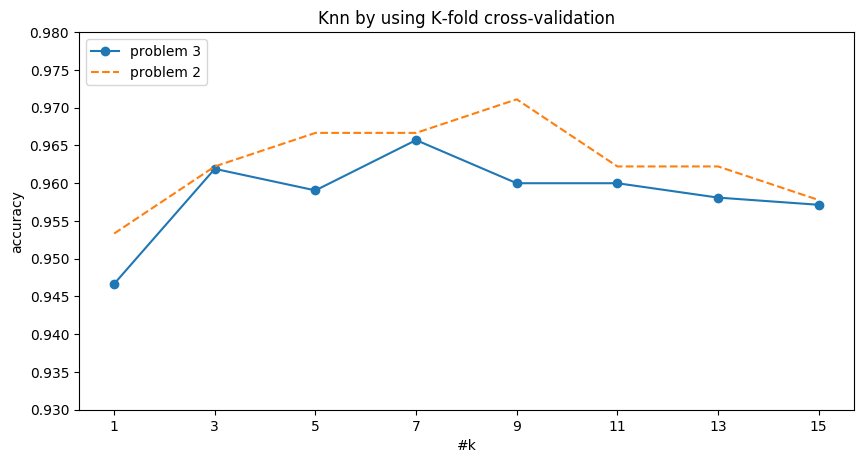

In [9]:
K = list(range(1, 15+1, 2))
Knn_acc_vc = []
for k in K:
    acc = []
    for i in range(N):
        model = MyKNeighborsClassifier(n_neighbors=k)
        # Assuming that I don't have test data
        X_train, _, y_train, _ = train_test_split(iris.data, 
                                                  iris.target, 
                                                  test_size=0.3)
        acc.append(np.mean(cross_val_score(model, X_train, 
                                           y_train, cv=5)))
        
    Knn_acc_vc.append(np.mean(acc))
    
fig = plt.figure(figsize=(10, 5), dpi=100, facecolor='white')
plt.plot(K, Knn_acc_vc, 'o-', label='problem 3')
plt.plot(K, Knn_acc, '--', label='problem 2')
plt.xticks(np.arange(1, 15+1, 2))
plt.yticks(np.arange(0.93, 0.98+0.005, 0.005))
plt.title('Knn by using K-fold cross-validation')
plt.ylabel('accuracy')
plt.xlabel('#k')
plt.legend(loc='upper left')
plt.show()

### 4 . In the class, we covered the naive Bayes classifier, but only with discrete-type features. Consult any paper to learn how to extend this approach to continuous-type features. Explain your finding as an algorithm.

Bayesian probability
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/52bd0ca5938da89d7f9bf388dc7edcbd546c118e)

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution.
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/951ea9195fc8021652c0e57d17c8819f78b0d452)

The joint model can be expressed as
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b1ade28a9aa4113ba19fa82b9f94be76bc37bce0)

We difine classifier like this ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/5ed52009429e5f3028302427a067822fdfc58059)

### 5 . Repeat problem 2 with your algorithm in problem 4. Compare the accuracy of naive Bayes classifier with the k-NN.

In [7]:
class MyGaussianNB:
    
    def __init__(self, **kwargs):
        self._class = {}
        self.set_params(**kwargs)
   
    def get_params(self, deep=True):
        return self.__dict__

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, X, y):      
        for Ck in np.unique(y):
            data = X[np.where(y == Ck)]
            self._class[Ck] = {'data':data}
            self._class[Ck]['mean'] = np.mean(data, axis=0)
            self._class[Ck]['var'] = np.var(data, axis=0)
            self._class[Ck]['prior'] = (data.shape[0] 
                                            / X.shape[0])
    
    def _likelihood(self, v, feature_index, Ck):
        var = self._class[Ck]['var'][feature_index]
        mean = self._class[Ck]['mean'][feature_index]
        exp = np.exp((-1 * (v - mean)**2) / (2 * var**2))
        return (1 / (np.sqrt(2 * np.pi * var**2))) * exp
        
    def _predict(self, x):
        class_prob = {Ck:None for Ck in self._class.keys()}
        
        for Ck, v in class_prob.items():
            prior = self._class[Ck]['prior']
            class_prob[Ck] = prior
            for i, xn in enumerate(x):
                class_prob[Ck] *= self._likelihood(xn, i, Ck)
        
        result = sorted(class_prob.items(), 
                        key=operator.itemgetter(1), 
                        reverse=True)
        return result[0][0]
    
    def score(self, X, y_true):
        return accuracy_score(y_true, self.predict(X))
    
    def predict(self, X):
        return np.apply_along_axis(lambda x: self._predict(x), 1, X)

acc:0.944


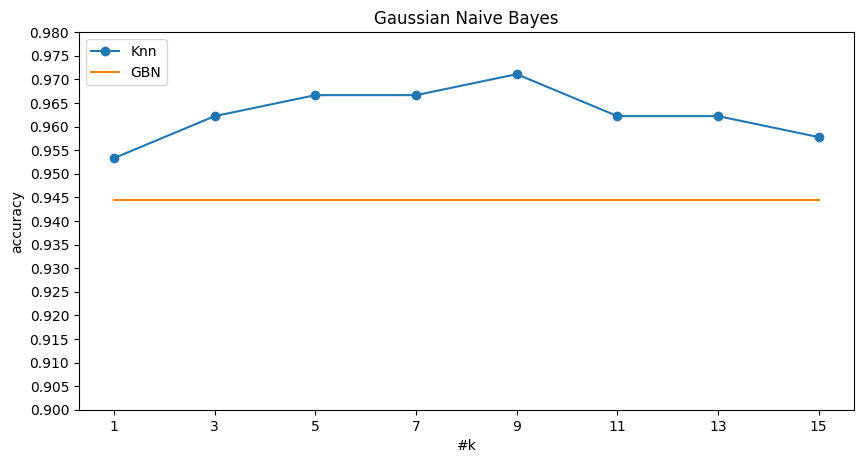

In [8]:
K = list(range(1, 15+1, 2))
GNB_acc = []
    
for i in range(N):
    GNB_model = MyGaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                        iris.target, 
                                                        test_size=0.3)
    GNB_model.fit(X_train, y_train)
    GNB_acc.append(accuracy_score(y_test, GNB_model.predict(X_test)))
    
print('acc:%.3f'%(np.mean(GNB_acc)))
fig = plt.figure(figsize=(10, 5), dpi=100, facecolor='white')
plt.plot(K, Knn_acc, 'o-', label='Knn')
plt.plot(K, [np.mean(GNB_acc)]*len(K), label='GBN')
plt.xticks(np.arange(1, 15+1, 2))
plt.yticks(np.arange(0.90, 0.98+0.005, 0.005))
plt.title('Gaussian Naive Bayes')
plt.ylabel('accuracy')
plt.xlabel('#k')
plt.legend(loc='upper left')
plt.show()